In [3]:
import matplotlib.pyplot as plt
import numpy as np

average strategy = 0.80 0.00 0.20 

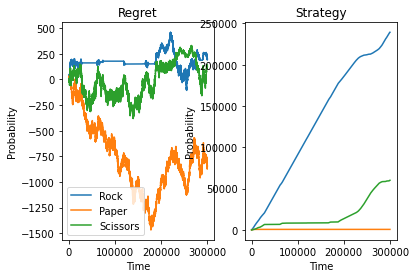

In [42]:
# translate RPS.cpp to python
import random

# 0 = rock, 1 = paper, 2 = scissors
payoff = [
    [[0, 0], [-1, 1], [1, -1]],
    [[1, -1], [0, 0], [-1, 1]],
    [[-1, 1], [1, -1], [0, 0]]
]

regretSum = [0, 0, 0]
strategySum = [0, 0, 0]

def action():
    # calculating current strategy
    strategy = [0, 0, 0] # local strategy
    normalizingSum = 0
    for i in range(3):
        strategy[i] = regretSum[i] if regretSum[i] > 0 else 0
        normalizingSum += strategy[i]
    for i in range(3):
        if normalizingSum > 0:
            strategy[i] /= normalizingSum
        else:
            strategy[i] = 1 / 3
        # for averaging later
        strategySum[i] += strategy[i]
    # sampling from strategy
    r = random.random()
    cumulativeProbability = 0
    for i in range(3):
        cumulativeProbability += strategy[i]
        if r < cumulativeProbability:
            return i
    assert(False)

B_strat = None 

def B_strategy():
    assert(B_strat is not None)
    while True:
        r = random.random()
        cum_prob = 0
        for i in range(3):
            cum_prob += B_strat[i]
            if r < cum_prob:
                return i

historical_strategySum = []
historical_regretSum = []
def play():
    A = action()
    # print(f"\t A = {A}, ", end="")
    B = B_strategy()  
    for i in range(3):  # regret for not playing each action
        regretSum[i] += payoff[i][B][0] - payoff[A][B][0]

average_strategy = [0, 0, 0]
def train():
    for _ in range(300000):
        # print("regrets = ", end="")
        # for j in range(3):
        #     print(f"{regret[j]:.2f} ", end="")
        play()
        historical_strategySum.append(strategySum.copy())
        historical_regretSum.append(regretSum.copy())
        # print()
    # get average strategy
    normalizingSum = 0
    for i in range(3):
        normalizingSum += strategySum[i]
    for i in range(3):
        if normalizingSum > 0:
            average_strategy[i] = strategySum[i] / normalizingSum
        else:
            average_strategy[i] = 1 / 3
    print("average strategy = ", end="")
    for i in range(3):
        print(f"{average_strategy[i]:.2f} ", end="")

if __name__ == "__main__":
    # seed random
    random.seed(44)
    # random.seed(time.time())
    train()
    # plot historical regret and strategy side by side
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(historical_regretSum)
    ax1.set_title("Regret")
    ax2.plot(historical_strategySum)
    ax2.set_title("Strategy")
    # set labels
    for ax in fig.get_axes():
        ax.set(xlabel='Time', ylabel='Probability')
    # set legend
    ax1.legend(["Rock", "Paper", "Scissors"])
    plt.show()

